## What to expect:
1. Checking for and dropping missing values
1. Dropping unneccessary columns
1. Examining and changing data types of columns
1. Renaming columns
1. Checking for and dropping outliers
1. Reducing number of categories within categorical columns
1. Generating new features from existing features
1. Answering the following questions with visualizations:
   - How have age ratings on video-games varied over time? i.e 1985 to 2016
   - Which was the best selling video game developer?
   - Which genres had the most sales globally and in each game developer?
1. Encoding categorical features
1. Splitting data into X and y
1. Fitting the data into a linear regression model
1. Monitoring the model's performance

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
import squarify
sns.set_style('darkgrid')
sns.set(rc={
    'axes.facecolor':'#FAF9F6',
    'figure.facecolor':'#FAF9F6'
})

import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error

In [2]:
video_sales = pd.read_csv('C:\\Users\\User\\Data Projects\\ML_practice\\ML_data\\Video game sales.csv')

In [3]:
video_sales.shape

(16719, 16)

### About the data:
- **Global sales** - Sales made in millions of dollars
- **Critic score** - Aggregate score compiled by Metacritic staff
- **Critic count** - The number of critics used in coming up with the critic score
- **User score** - Aggregate score by Metacritic subscribers
- **User count** - The number of subscribers who contributed to the user score
- **Rating** - Age ratings as per the Entertainment Software Rating Board

In [4]:
video_sales.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [5]:
video_sales.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [6]:
def drop_nulls(df:pd.DataFrame)->pd.DataFrame:
    """this function drops missing along the rows of
    the dataframe. It returns a dataframe free of missing values"""
    df.dropna(axis='rows', inplace=True)
    return df

In [7]:
def tweak_columns(df:pd.DataFrame, keep_columns:list)->pd.DataFrame:
    df = df[keep_columns]
    return df

In [8]:
def tweak_user_score(df:pd.DataFrame)->pd.DataFrame:
    df = df.drop(df[df['User_Score'] == 'tbd'].index)
    return df

In [9]:
def tweak_ratings(df:pd.DataFrame)->pd.DataFrame:
    return df.replace(to_replace=['E', 'T', 'M', 'EC', 'E10+', 'K-A', 'AO', 'RP'], 
                    value=['Everyone', 'Teens', 'Mature Audience', 'Early Childhood',
                           'Teens', 'Everyone','Mature Audience', 'Rating Pending'])

In [10]:
def change_dtypes(df:pd.DataFrame, type_dict:dict)->pd.DataFrame:
    return df.astype(type_dict)

In [11]:
def rename_cols(df:pd.DataFrame)->pd.DataFrame:
    df.columns = [ name.lower() for name in df.columns]
    return df   

In [12]:
keep_columns = [
    'Name', 'Platform', 'Year_of_Release', 'Genre', 
    'Publisher', 'Global_Sales', 'Rating', 
    'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'
]

type_dict = {
    'Year_of_Release':'int32',
    'Global_Sales':'float16',
    'Critic_Score':'float16',
    'Critic_Count':'int32',
    'User_Score':'float16',
    'User_Count':'int32',
    'Name':'string',
    'Platform':'string',
    'Genre':'string',
    'Publisher':'string',
    'Rating':'category'
}

In [13]:
def master_clean(df:pd.DataFrame)->pd.DataFrame:
    return (df
           .pipe(drop_nulls)
           .pipe(tweak_columns, keep_columns)
           .pipe(tweak_user_score)
           .pipe(tweak_ratings)
           .pipe(change_dtypes, type_dict)
           .pipe(rename_cols)
           .reset_index(drop=True))

In [14]:
video_sales = master_clean(video_sales)
video_sales

,name,platform,year_of_release,genre,publisher,global_sales,rating,critic_score,critic_count,user_score,user_count
0,Wii Sports,Wii,2006,Sports,Nintendo,82.500000,Everyone,76.0,51,8.000000,322
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,35.531250,Everyone,82.0,73,8.296875,709
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,32.781250,Everyone,80.0,73,8.000000,192
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,29.796875,Everyone,89.0,65,8.500000,431
4,Wii Play,Wii,2006,Misc,Nintendo,28.921875,Everyone,58.0,41,6.601562,129
...,...,...,...,...,...,...,...,...,...,...,...
6820,E.T. The Extra-Terrestrial,GBA,2001,Action,NewKidCo,0.010002,Everyone,46.0,4,2.400391,21
6821,Mortal Kombat: Deadly Alliance,GBA,2002,Fighting,Midway Games,0.010002,Mature Audience,81.0,12,8.796875,9
6822,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,Konami Digital Entertainment,0.010002,Mature Audience,80.0,20,7.601562,412
6823,Breach,PC,2011,Shooter,Destineer,0.010002,Teens,61.0,12,5.800781,43


In [15]:
video_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             6825 non-null   string  
 1   platform         6825 non-null   string  
 2   year_of_release  6825 non-null   int32   
 3   genre            6825 non-null   string  
 4   publisher        6825 non-null   string  
 5   global_sales     6825 non-null   float16 
 6   rating           6825 non-null   category
 7   critic_score     6825 non-null   float16 
 8   critic_count     6825 non-null   int32   
 9   user_score       6825 non-null   float16 
 10  user_count       6825 non-null   int32   
dtypes: category(1), float16(3), int32(3), string(4)
memory usage: 340.2 KB


In [16]:
video_sales['platform'].value_counts()

PS2     1140
X360     858
PS3      769
PC       651
XB       565
Wii      479
DS       464
PSP      390
GC       348
PS4      239
GBA      237
XOne     159
3DS      155
PS       150
PSV      118
WiiU      89
DC        14
Name: platform, dtype: Int64

In [17]:
video_sales['genre'].value_counts()

Action          1630
Sports           943
Shooter          864
Role-Playing     712
Racing           581
Platform         403
Misc             384
Fighting         378
Simulation       297
Strategy         267
Adventure        248
Puzzle           118
Name: genre, dtype: Int64

In [18]:
video_sales['publisher'].value_counts()

Electronic Arts                944
Ubisoft                        496
Activision                     492
Sony Computer Entertainment    316
THQ                            307
                              ... 
Zushi Games                      1
NewKidCo                         1
2D Boy                           1
Media Rings                      1
Valve                            1
Name: publisher, Length: 262, dtype: Int64

In [19]:
video_sales['rating'].value_counts()

Teens              3307
Everyone           2083
Mature Audience    1434
Rating Pending        1
Name: rating, dtype: int64

In [20]:
video_sales['year_of_release'].max()

2016

In [21]:
video_sales[['user_score', 'critic_score', 'global_sales',
            'critic_count', 'user_count']].describe()

,user_score,critic_score,global_sales,critic_count,user_count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,7.187500,inf,0.777832,28.931136,174.722344
std,1.440430,13.867188,1.963867,19.224165,587.428538
min,0.500000,13.000000,0.010002,3.000000,4.000000
25%,6.500000,62.000000,0.109985,14.000000,11.000000
50%,7.500000,72.000000,0.290039,25.000000,27.000000
75%,8.203125,80.000000,0.750000,39.000000,89.000000
max,9.601562,98.000000,82.500000,113.000000,10665.000000


### Let's examine some distributions

Here we are going to take a look at the distributions of the following features:
- Global sales
- User count
- Critic count
- User score
- Critic score

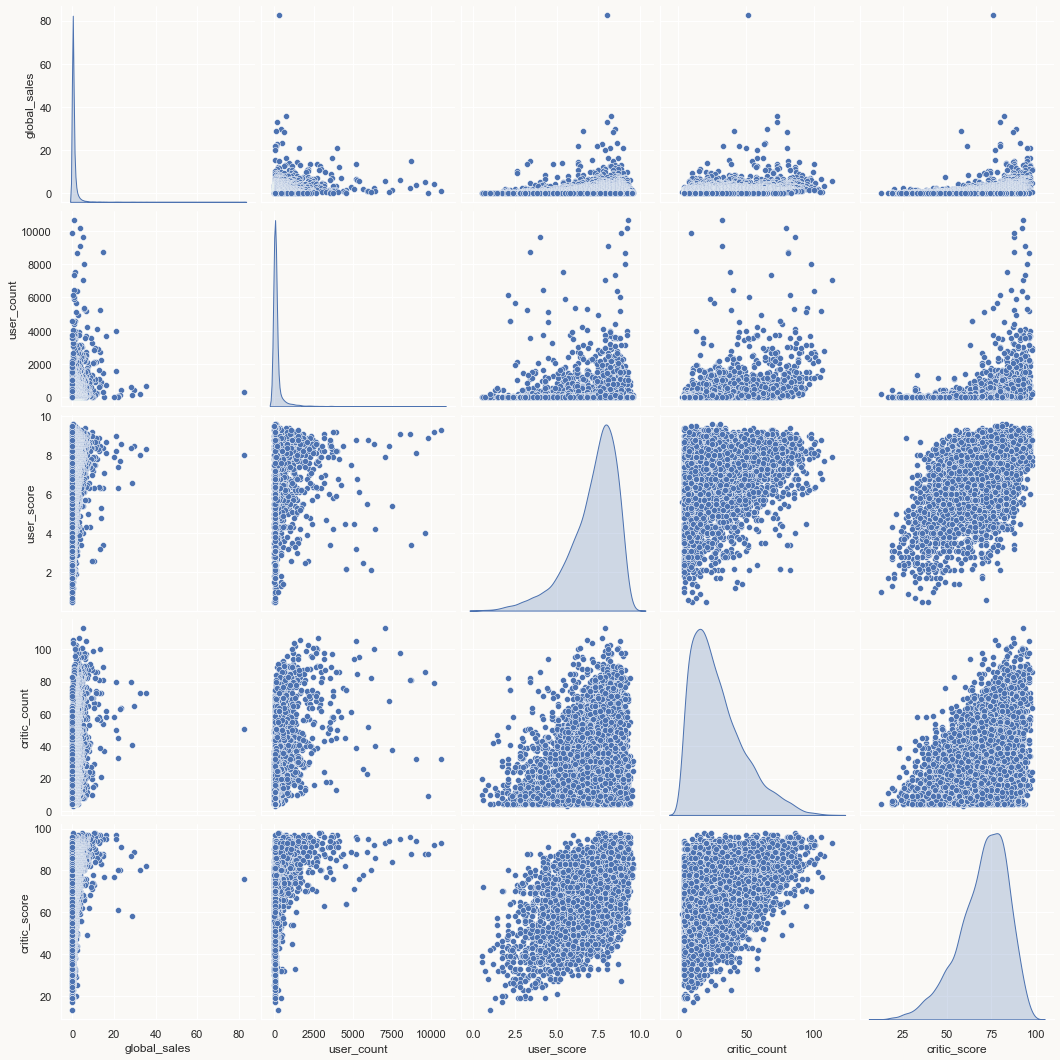

In [22]:

variables = ['global_sales', 'user_count', 'user_score',
            'critic_count', 'critic_score']
sns.pairplot(video_sales, height=3, vars=variables, diag_kind='kde')

In [23]:
def make_boxplot(df:pd.DataFrame, title_text:str):
    fig, ax = plt.subplots(figsize=(15,6))
    sns.boxplot(data=df, orient='h')
    plt.title(str.title(title_text))

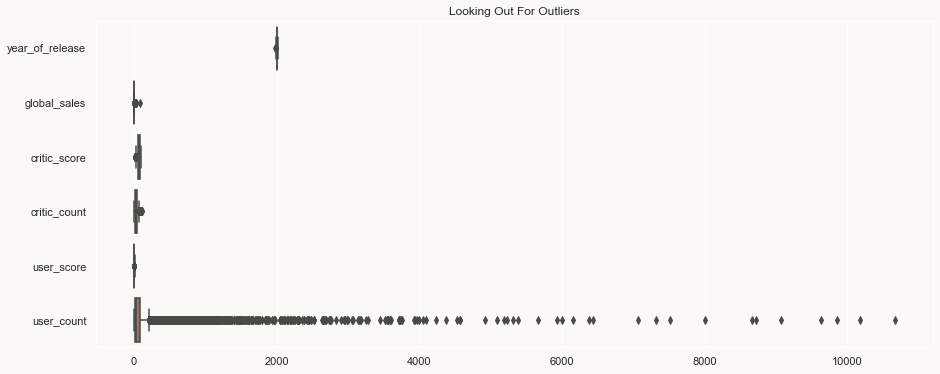

In [24]:
make_boxplot(df=video_sales, title_text='looking out for outliers')

#### Observation:
* There are small outlier groups of in _Global sales_, _Critic count_ columns but the _User count_ column has 
  the most prominent number of outliers.

In [25]:
def delete_outliers(df:pd.DataFrame, col:str)->pd.DataFrame:
    std = np.std(df[col])
    mean = np.mean(df[col])
    upper_bound, lower_bound = (mean + 3*std), (mean - 3*std)
    print(f"original dataframe shape: {df.shape}")
    df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    print(f"dataframe shape after outlier removal: {df.shape}")
    return df

In [26]:
video_sales = video_sales.pipe(delete_outliers,
                 'user_count').pipe(delete_outliers,
                                    'global_sales').pipe(delete_outliers, 'critic_count').reset_index(drop=True)
video_sales

original dataframe shape: (6825, 11)
dataframe shape after outlier removal: (6709, 11)
original dataframe shape: (6709, 11)
dataframe shape after outlier removal: (6639, 11)
original dataframe shape: (6639, 11)
dataframe shape after outlier removal: (6580, 11)


,name,platform,year_of_release,genre,publisher,global_sales,rating,critic_score,critic_count,user_score,user_count
0,Driver,PS,1999,Action,GT Interactive,6.269531,Teens,87.0,22,8.101562,78
1,Kinect Sports,X360,2010,Sports,Microsoft Game Studios,6.191406,Teens,73.0,51,7.398438,95
2,FIFA 15,PS4,2014,Sports,Electronic Arts,6.078125,Everyone,82.0,47,5.699219,988
3,Metal Gear Solid 2: Sons of Liberty,PS2,2001,Action,Konami Digital Entertainment,6.050781,Mature Audience,96.0,42,8.703125,1026
4,Metal Gear Solid,PS,1998,Action,Konami Digital Entertainment,6.031250,Mature Audience,94.0,20,9.398438,918
...,...,...,...,...,...,...,...,...,...,...,...
6575,E.T. The Extra-Terrestrial,GBA,2001,Action,NewKidCo,0.010002,Everyone,46.0,4,2.400391,21
6576,Mortal Kombat: Deadly Alliance,GBA,2002,Fighting,Midway Games,0.010002,Mature Audience,81.0,12,8.796875,9
6577,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,Konami Digital Entertainment,0.010002,Mature Audience,80.0,20,7.601562,412
6578,Breach,PC,2011,Shooter,Destineer,0.010002,Teens,61.0,12,5.800781,43


#### Outlier elimination DONE:
- The outliers contained in _Global sales, User count and Critic count_ have now been removed

#### Creating new features:
Here we are going to derive the following features:
1. __Recency__ - This feature will be used as an indicator of how long a video game
   has been in the market since its release.
1. __Developer__ - It gives the general platforms on which video games exist eg. _PS2 and PS3_ can be
   be classified under _Playstation_ mother platform
1. __Mother genre__ - It gives a generalised classification of the video game genres eg. _Racing and Fighting_ can be      classified under the _Sports_ category

In [27]:
def game_age(df:pd.DataFrame, year_column:str)->pd.DataFrame:
    return df.assign(recency = lambda df:(2016 - df[year_column]).astype('int32'))

In [28]:
def generalise_genre(df:pd.DataFrame, genre:str)->pd.DataFrame:
    
    return df.assign(mother_genre = lambda df:df[genre]
                     .replace(to_replace=['Racing', 'Fighting', 'Shooter','Puzzle', 'Adventure', 'Simulation','Role-Playing'],
                              value=['Sports', 'Sports', 'Action', 'Strategy', 'Strategy', 'Role playing', 'Role playing'])
                     .drop(df[(df[genre] == 'Platform')|(df[genre] == 'Misc')].index)
                     .astype('string'))

In [29]:
def generalise_platform(df:pd.DataFrame, platform:str)->pd.DataFrame:
    return df.assign(developer = lambda df:df[platform]
                     .replace(to_replace=['PS', 'PS2', 'PS3', 'PS4', 'PSV', 'PSP',
                                         'XOne', 'XB', 'X360', 'DS', 'DC', 'GC',
                                         'GBA', 'Wii', 'WiiU', '3DS'],
                             value=['Playstation', 'Playstation', 'Playstation', 'Playstation',
                                   'Playstation', 'Playstation', 'XBox', 'XBox', 'XBox', 'Nintendo',
                                   'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo',
                                   ])
                     .astype('string'))

In [30]:
def feature_engineering(df:pd.DataFrame)->pd.DataFrame:
    return(df
           
    .pipe(game_age, 'year_of_release')
    .pipe(generalise_genre, 'genre')
    .pipe(generalise_platform, 'platform')
    .pipe(drop_nulls)
    .sort_values(by='year_of_release', ascending=True)
    .set_index('year_of_release').reset_index())

In [31]:
video_sales = feature_engineering(video_sales)
video_sales

,year_of_release,name,platform,genre,publisher,global_sales,rating,critic_score,critic_count,user_score,user_count,recency,mother_genre,developer
0,1985,Alter Ego,PC,Simulation,Activision,0.029999,Teens,59.0,9,5.800781,19,31,Role playing,PC
1,1992,Doom,PC,Shooter,id Software,0.029999,Mature Audience,85.0,44,8.203125,1796,24,Action,PC
2,1994,Battle Arena Toshinden,PS,Fighting,Sony Computer Entertainment,1.269531,Teens,69.0,4,6.300781,4,22,Sports,Playstation
3,1996,Resident Evil,PS,Action,Virgin Interactive,5.050781,Mature Audience,91.0,8,9.000000,266,20,Action,Playstation
4,1996,Super Puzzle Fighter II Turbo,PS,Puzzle,Virgin Interactive,0.140015,Everyone,83.0,9,7.398438,5,20,Strategy,Playstation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5814,2016,Duke Nukem 3D: 20th Anniversary World Tour,PS4,Shooter,Gearbox Software,0.029999,Mature Audience,77.0,15,6.898438,15,0,Action,Playstation
5815,2016,Kirby: Planet Robobot,3DS,Action,Nintendo,0.930176,Everyone,81.0,71,8.703125,87,0,Action,Nintendo
5816,2016,Sid Meier's Civilization VI,PC,Strategy,Take-Two Interactive,0.250000,Teens,88.0,81,7.300781,684,0,Strategy,PC
5817,2016,Darksiders: Warmastered Edition,PS4,Action,Nordic Games,0.020004,Mature Audience,79.0,9,8.500000,15,0,Action,Playstation


In [32]:
video_sales.mother_genre.isnull().sum()

0

In [33]:
video_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819 entries, 0 to 5818
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   year_of_release  5819 non-null   int64   
 1   name             5819 non-null   string  
 2   platform         5819 non-null   string  
 3   genre            5819 non-null   string  
 4   publisher        5819 non-null   string  
 5   global_sales     5819 non-null   float16 
 6   rating           5819 non-null   category
 7   critic_score     5819 non-null   float16 
 8   critic_count     5819 non-null   int32   
 9   user_score       5819 non-null   float16 
 10  user_count       5819 non-null   int32   
 11  recency          5819 non-null   int32   
 12  mother_genre     5819 non-null   string  
 13  developer        5819 non-null   string  
dtypes: category(1), float16(3), int32(3), int64(1), string(6)
memory usage: 426.5 KB


In [34]:
bar_colors = [
    "#191919",
    "#2d4263",
    "#C84B31",
    "#ECDBBA"
]

treemap_colors = [
   "#F5F0BB",
    "#C4DFAA",
    "#90C8AC",
    "#73A9AD"
]

line_colors =[
    "#2A0944",
    "#3FA796",
    "#FEC260",
    "#A10035"
]

### Question? : How have age ratings on video-games varied over time? i.e 1985 to 2016

In [35]:
by_rating = pd.crosstab(index=video_sales['year_of_release'],
            columns=video_sales['rating'],
            values=video_sales['global_sales'],
           aggfunc='sum')

In [36]:
by_rating.index

Int64Index([1985, 1992, 1994, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
            2015, 2016],
           dtype='int64', name='year_of_release')

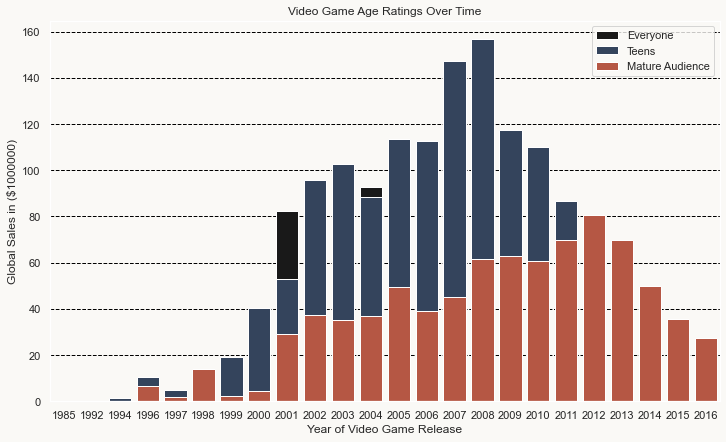

In [37]:
fig, ax = plt.subplots(figsize=(12,7))
b_1 = sns.barplot(data=by_rating,
                  x=by_rating.index,
                  y=by_rating['Everyone'], 
                  color=bar_colors[0],
                 label='Everyone')

b_2 = sns.barplot(data=by_rating,
                 x=by_rating.index,
                 y=by_rating['Teens'],
                 color=bar_colors[1],
                 label='Teens')

b_3 = sns.barplot(data=by_rating,
                 x=by_rating.index,
                 y=by_rating['Mature Audience'],
                 color=bar_colors[2],
                 label='Mature Audience')


ax.set_title(str.title('video game age ratings over time'))
ax.set_xlabel('Year of Video Game Release')
ax.set_ylabel('Global Sales in ($1000000)')
plt.grid(visible=True,
        axis='y',
        color='black',
        linestyle='--')

ax.legend()    
plt.show()

#### Insight:
- There has been a rise in the number of Teens-rated video games within the 2000 to 2010 decade
- Video games for mature audiences have gained popularity over Teens-rated video games in the 2011-2016 period
- There has been a dip in global sales for video games in the post-2008 period

### Which was the best selling video game developer?

In [38]:
def make_treemap(df:pd.DataFrame,
                 quantity:str, 
                 category:str,
                title_str:str):
    
    fig, ax = plt.subplots(figsize=(12,6))
    squarify.plot(sizes=df[quantity],
             label=df[category],
             color=treemap_colors).set(title=str.title(title_str), alpha=.2)
    
    
    plt.axis('off')
    plt.savefig(f"{title_str[:2]}.png")
    plt.show()

In [39]:
by_developer = video_sales.groupby(
    ['developer']).agg({'global_sales':'sum'}).sort_values(by='global_sales', ascending=False).reset_index()
by_developer

,developer,global_sales
0,Playstation,1713.0000
1,XBox,799.5000
2,Nintendo,697.5000
3,PC,105.6875


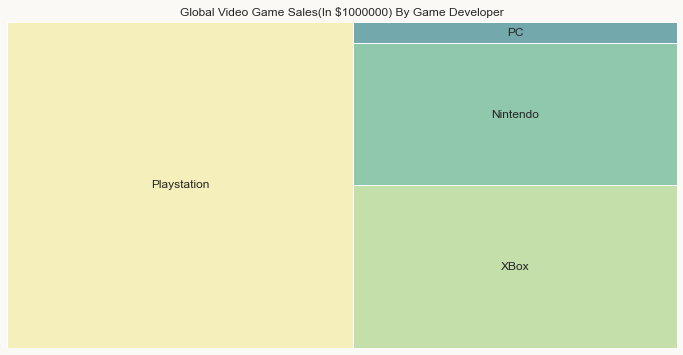

In [40]:
make_treemap(df=by_developer,
            quantity='global_sales',
            category='developer',
            title_str='global video game sales(in $1000000) by game developer')


#### Insight:
- Playstation came out on top as the best selling video game developer

In [41]:
by_console = video_sales.groupby(['developer',
                                  'platform']).agg({'global_sales':'sum'}).sort_values(by='global_sales', ascending=False).reset_index()

In [42]:
def make_barplot(df, col_x:str, col_y:str, hue_col:str, title:str):
    """creates a bar-plot for the given input input variables.
    :col_x defines the variables that falls on the x axis in the plot
    :col_y defines the variables that falls on the y axis in the plot
    :title defines the text to be used as the title of the plot"""
    fig, ax = plt.subplots(figsize=(14,12))
    sns.barplot(x=col_x,
                y=col_y,
                data=df,
                palette=bar_colors,
                hue=hue_col,
                order=list(df[col_y].unique()))
##formatting text for the plot's title    
    ax.set_title(str.title(title))
    
##formatting text for x and y labels    
    ax.set_xlabel(col_x.replace('_', ' '))
    ax.set_ylabel(col_y.replace('_', ' '))
    

    
## editing the appearance of tick labels    
    ax.tick_params(axis='both', labelcolor='black')
    
## editing which spines can be seen in the plot    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
## setting grid lines to be unseen    
    plt.grid(visible=True, color='black', linestyle='--', axis='x')
    ax.legend(loc='right')

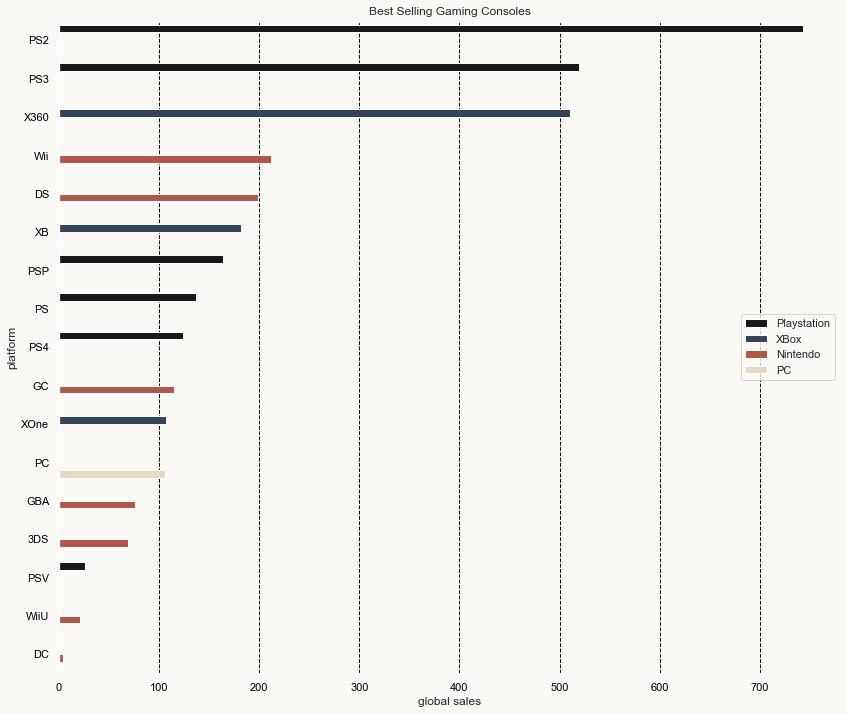

In [43]:
make_barplot(df=by_console,
            col_x='global_sales',
            col_y='platform',
            hue_col='developer',
            title='best selling gaming consoles')

#### Insight:
- PS2 and PS3 were the best selling consoles by Playstation
- X360 was XBox's best selling console
- Wii and DS were the best selling consoles for Nintendo

### Which genres had the most sales globally and in each game developer?

In [44]:
video_sales.columns

Index(['year_of_release', 'name', 'platform', 'genre', 'publisher',
       'global_sales', 'rating', 'critic_score', 'critic_count', 'user_score',
       'user_count', 'recency', 'mother_genre', 'developer'],
      dtype='object')

In [45]:
year_genre = video_sales.groupby(['year_of_release', 'mother_genre']).agg({'global_sales':'sum'}).reset_index()
year_genre

,year_of_release,mother_genre,global_sales
0,1985,Role playing,0.029999
1,1992,Action,0.029999
2,1994,Sports,1.269531
3,1996,Action,9.679688
4,1996,Role playing,1.589844
...,...,...,...
81,2015,Strategy,1.879883
82,2016,Action,37.875000
83,2016,Role playing,4.351562
84,2016,Sports,18.093750


In [46]:
def make_linechart(df, col_x:str, col_y:str, hue_col:str, title:str):
    """creates a line-plot for the given input input variables.
    :col_x defines the variables that falls on the x axis in the plot
    :col_y defines the variables that falls on the y axis in the plot
    :title defines the text to be used as the title of the plot"""
    fig, ax = plt.subplots(figsize=(12,7))
    sns.lineplot(x=col_x,
                y=col_y,
                data=df,
                palette=line_colors,
                hue=hue_col)
##formatting text for the plot's title    
    ax.set_title(str.title(title))
    
##formatting text for x and y labels    
    ax.set_xlabel(col_x.replace('_', ' '))
    ax.set_ylabel(col_y.replace('_', ' '))
    

    
## editing the appearance of tick labels    
    ax.tick_params(axis='both', labelcolor='black')
    
## editing which spines can be seen in the plot    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
## setting grid lines to be unseen    
    plt.grid(visible=True, color='black', linestyle='--', axis='y')
    ax.legend(loc='upper left')

In [47]:
video_sales.mother_genre.value_counts()

Action          2366
Sports          1873
Role playing     961
Strategy         619
Name: mother_genre, dtype: Int64

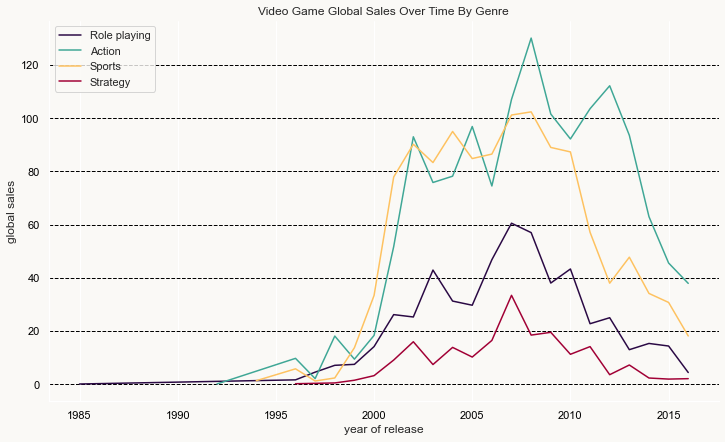

In [48]:
make_linechart(df=year_genre,
              col_x='year_of_release',
              col_y='global_sales',
              hue_col='mother_genre',
              title='video game global sales over time by genre')

#### Insight:
- It appears that over time, the consumers of video games have preferred action and sports based video games
- Video games based on strategy such as chess had a lower adoption in the market compared to their sports-based and action-based counterparts

In [49]:
genre_developer = pd.crosstab(index=video_sales['mother_genre'],
           columns=video_sales['developer'],
           values=video_sales['global_sales'],
           aggfunc='sum').reset_index()

In [50]:
genre_developer

developer,mother_genre,Nintendo,PC,Playstation,XBox
0,Action,245.6250,33.000000,729.00000,406.250000
1,Role playing,183.2500,45.437500,230.50000,70.687500
2,Sports,164.7500,9.851562,702.50000,303.750000
3,Strategy,103.8125,17.375000,51.21875,18.953125


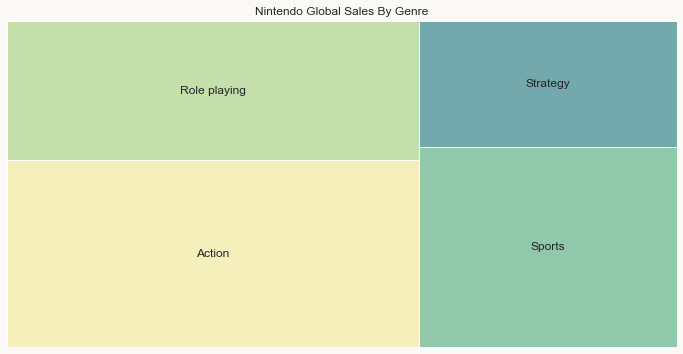

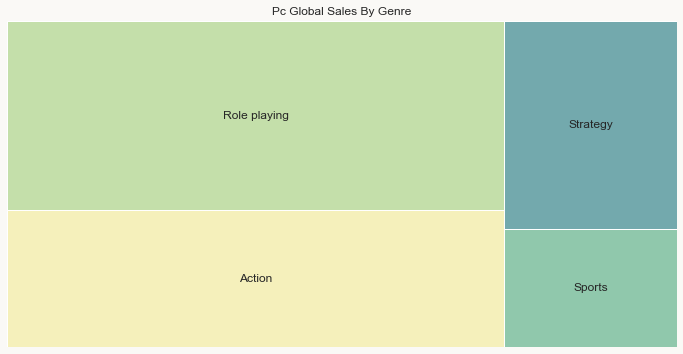

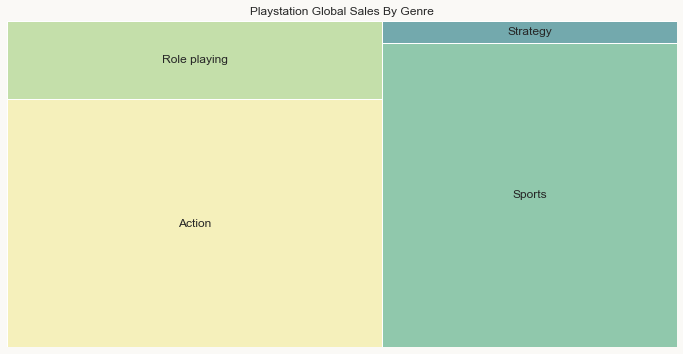

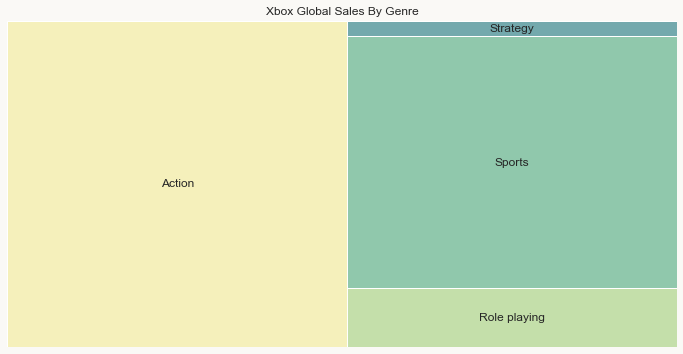

In [51]:
columns = genre_developer.columns[1:]
for q in columns:
    make_treemap(df=genre_developer,
            quantity=q,
            category='mother_genre',
            title_str=f"{q} global sales by genre")


#### Insight:
- XBox and Playstation consoles had Action-based and Sports-based video games as their best sellers
- Roleplay and Action were the best selling genres within the Nintendo and PC consoles

In [52]:
def make_regplot(df:pd.DataFrame,
                 col_x:str,
                 col_y:str,
                 title:str):
    """creates a scatter plot for the given input input variables.
    :col_x defines the variables that falls on the x axis in the plot
    :col_y defines the variables that falls on the y axis in the plot
    :title defines the text to be used as the title of the plot"""
    
    fig, ax = plt.subplots(figsize=(10,7))
    font = {'family':'sans',
            'color':'black',
            'weight':'medium',
            'size':12
           }
    
    sns.regplot(x=col_x,
                y=col_y,
                data=df,
                color=line_colors[0])
##formatting text for the plot's title    
    ax.set_title(str.title(title), fontdict=font)
    
##formatting text for x and y labels    
    ax.set_xlabel(col_x.replace('_', ' '), fontdict=font)
    ax.set_ylabel(col_y.replace('_', ' '), fontdict=font)
    
##setting the direction labels on the x axis face    
    plt.xticks(rotation=60)
    
## editing which spines can be seen in the plot    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
## setting grid lines to be unseen    
    plt.grid(visible=True, which='both', axis='both', color='black', linestyle='--')

### Encoding categorical features

In [53]:
def encode_category(df:pd.DataFrame, cols:list)->pd.DataFrame:
    encoder = ce.BinaryEncoder(cols=cols, return_df=True)
    encoded = encoder.fit_transform(df[cols])
    return encoded

In [54]:
def concatenate_cols(df:pd.DataFrame, cols:list)->pd.DataFrame:
    updated_df = pd.concat([encoded, df[cols]], axis=1, join="outer")
    print(f"concatenated dataframe shape: {updated_df.shape}")
    X = updated_df.iloc[:, :-1]
    y = updated_df.iloc[:, -1]
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    return X, y

In [55]:
cat_cols = ['developer', 'mother_genre', 'rating']
num_cols = ['user_score', 'user_count', 'critic_score', 'critic_count', 'recency', 'global_sales']

encoded = encode_category(df=video_sales, cols=cat_cols)
X, y = concatenate_cols(video_sales, num_cols)

concatenated dataframe shape: (5819, 15)
X shape: (5819, 14)
y shape: (5819,)


### Splitting our data in chronological order

In [56]:
def split_df(predictor:pd.DataFrame, target:pd.DataFrame, split_ratio:float)->pd.DataFrame:
    boundary = round(split_ratio * predictor.shape[0])
    train_x, test_x = [
        predictor.iloc[:boundary, :],
        predictor.iloc[boundary:, :]
    ]
    print(f"split X shapes: {train_x.shape}, {test_x.shape}")
    
    train_y, test_y = [
        target.iloc[:boundary],
        target.iloc[boundary:]
    ]
    print(f"split y shapes: {train_y.shape}, {test_y.shape}")
    return train_x, test_x, train_y, test_y

### Monitoring the performance of the regressor

In [57]:
### creating a list of ratios to split into train and test data

ratio = 0.5
ratio_list = []
for i in range(0,8):
    ratio = ratio + 0.05
    ratio_list.append(ratio)
print(ratio_list)

[0.55, 0.6000000000000001, 0.6500000000000001, 0.7000000000000002, 0.7500000000000002, 0.8000000000000003, 0.8500000000000003, 0.9000000000000004]


split X shapes: (3200, 14), (2619, 14)
split y shapes: (3200,), (2619,)
split X shapes: (3491, 14), (2328, 14)
split y shapes: (3491,), (2328,)
split X shapes: (3782, 14), (2037, 14)
split y shapes: (3782,), (2037,)
split X shapes: (4073, 14), (1746, 14)
split y shapes: (4073,), (1746,)
split X shapes: (4364, 14), (1455, 14)
split y shapes: (4364,), (1455,)
split X shapes: (4655, 14), (1164, 14)
split y shapes: (4655,), (1164,)
split X shapes: (4946, 14), (873, 14)
split y shapes: (4946,), (873,)
split X shapes: (5237, 14), (582, 14)
split y shapes: (5237,), (582,)
split X shapes: (3200, 14), (2619, 14)
split y shapes: (3200,), (2619,)
split X shapes: (3491, 14), (2328, 14)
split y shapes: (3491,), (2328,)
split X shapes: (3782, 14), (2037, 14)
split y shapes: (3782,), (2037,)
split X shapes: (4073, 14), (1746, 14)
split y shapes: (4073,), (1746,)
split X shapes: (4364, 14), (1455, 14)
split y shapes: (4364,), (1455,)
split X shapes: (4655, 14), (1164, 14)
split y shapes: (4655,), (116

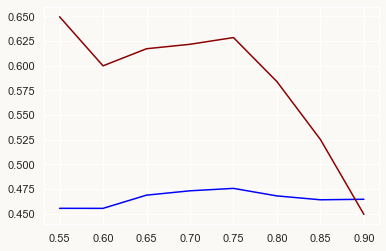

In [58]:
### trying to find out which train_test split ratio is most suitable
regressors = [LinearRegression(),
                RandomForestRegressor()]
mae_list = []
for r in regressors:
    for ratio in ratio_list:
        X_train, X_test, y_train, y_test = split_df(predictor=X, target=y, split_ratio=ratio)
        r = r.fit(X_train, y_train)
        prediction = r.predict(X_test)
        def mae(y_true, y_pred):
            return np.average(abs(y_true - y_pred))
        performance = mae(y_test, prediction)
        mae_list.append(performance)
        lr_mae = mae_list[:len(ratio_list)]
        rf_mae = mae_list[len(ratio_list):]
plt.plot(ratio_list, lr_mae, color='blue')
plt.plot(ratio_list, rf_mae, color='darkred')

- It appears that a train to test ratio of 0.8:0.2 is optimal

In [59]:
def assess_regressor(predictor:pd.DataFrame, target:pd.DataFrame):
    
    def initiate_reg():
        X_train, X_test, y_train, y_test = split_df(predictor=predictor, target=target, split_ratio=0.8)
        reg = LinearRegression().fit(X_train, y_train)
        label = 'linear regressor'
        print(f"{label} created")
        return reg
        
    def model_performance():
        reg = initiate_reg()
        y_pred = reg.predict(X_test)
        metrics = {"MAE score":mean_absolute_error(y_test, y_pred),
                   "MAPE score":mean_absolute_percentage_error(y_test, y_pred),
                   }
        return metrics, y_pred
    
    metrics, y_pred = model_performance()
    print(f"naive model MAE score: {np.mean(y_test)}")
    for metric_label, metric in metrics.items():
        print(f"linear regressor {metric_label}: {metric}")
        
    fig, ax = plt.subplots(figsize=(12,7))
    sns.kdeplot(y_test, color=line_colors[0], label="actual sales")
    sns.kdeplot(y_pred, color=line_colors[1], label="predicted sales")
    plt.legend()
            

split X shapes: (4655, 14), (1164, 14)
split y shapes: (4655,), (1164,)
linear regressor created
naive model MAE score: 0.469970703125
linear regressor MAE score: 0.5032510339245434
linear regressor MAPE score: 5.191120613054166


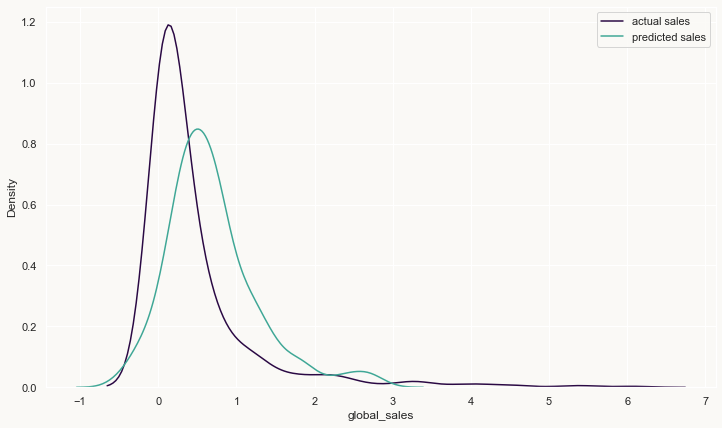

In [60]:
assess_regressor(predictor=X, target=y)

- More could be done on our predictor features to improve the performance of the linear model